# Econ231  ARIMA model for Exchange Rate

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1. Import Data

In [2]:
df = pd.read_excel(r'C:\Users\Moses\Desktop\econ231_2020spring\forecasting\US_UK_rawdata.xls', header=28)

In [3]:
df.set_index('observation_date',inplace=True)

In [4]:
df.head()

,r_lb_us,r_lb_uk,r_sb_us,r_sb_uk,cpi_us,cpi_uk,y_us,y_uk,r_si_us,r_si_uk,m1_us,m1_uk,m3_us,m3_uk,m0_us,m0_uk,tb_us,tb_uk,s_us_uk
observation_date,,,,,,,,,,,,,,,,,,,
1973-03-01,6.71,9.78,6.09,7.94,18.268732,10.404152,44.176934,81.077180,7.05,NaN,2.517000e+11,NaN,8.153000e+11,NaN,79095000000,4.840890e+09,374000000.0,-393000000.0,2.4724
1973-04-01,6.67,9.66,6.26,7.67,18.395305,10.602155,44.119871,80.377377,7.31,NaN,2.527000e+11,NaN,8.197000e+11,NaN,79638000000,4.802110e+09,245000000.0,-167000000.0,2.4837
1973-05-01,6.85,9.74,6.36,7.20,18.521878,10.680156,44.399419,80.377377,7.55,NaN,2.549000e+11,NaN,8.268000e+11,NaN,79957000000,4.930070e+09,29000000.0,-362000000.0,2.5306
1973-06-01,6.90,9.88,7.19,6.96,18.648451,10.734157,44.431312,81.876955,8.16,NaN,2.567000e+11,NaN,8.333000e+11,NaN,80382000000,4.949450e+09,-12000000.0,-268000000.0,2.5762
1973-07-01,7.13,10.43,8.01,10.89,18.690642,10.782158,44.614891,81.477068,9.70,NaN,2.575000e+11,NaN,8.365000e+11,NaN,81463000000,4.984340e+09,-262000000.0,-293000000.0,2.5375


In [5]:
ts=df[['s_us_uk']]
ts.index.rename('month',inplace=True)
ts.head()

,s_us_uk
month,
1973-03-01,2.4724
1973-04-01,2.4837
1973-05-01,2.5306
1973-06-01,2.5762
1973-07-01,2.5375


## 2. Summarize Data

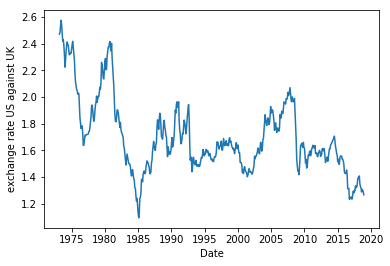

In [6]:
plt.xlabel('Date')
plt.ylabel('exchange rate US against UK')
plt.plot(ts)

Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


Augmented Dickey-Fuller Test: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

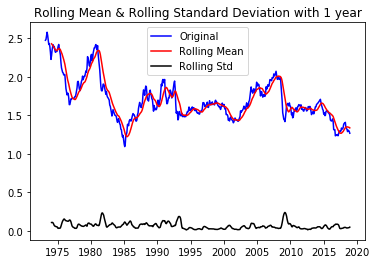

In [7]:
rolling_mean = ts.rolling(window = 12).mean()
rolling_std = ts.rolling(window = 12).std()
plt.plot(ts, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation with 1 year')
plt.show()

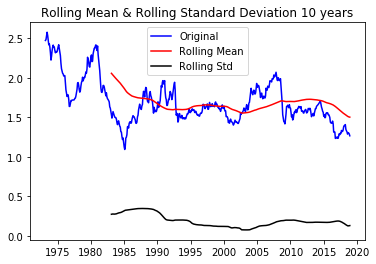

In [8]:
rolling_mean = ts.rolling(window = 120).mean()
rolling_std = ts.rolling(window = 120).std()
plt.plot(ts, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation 10 years')
plt.show()

As you can see, the rolling mean and rolling standard deviation decrease with time. Therefore, we can conclude that the time series is not stationary.

In [9]:
result = adfuller(ts['s_us_uk'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.374644878424642
p-value: 0.011854198448192797
Critical Values:
	1%: -3.442383534871275
	5%: -2.8668480382580386
	10%: -2.569597004924258


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.01). Thus, we can conclude that the time series is not stationary.

## 3. Process Data

Taking the log of the dependent variable is as simple way of lowering the rate at which rolling mean increases.

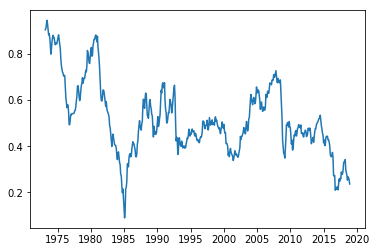

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [11]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation with 1 year')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['s_us_uk'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

There are multiple transformations that we can apply to a time series to render it stationary. For instance, we subtract the rolling mean.

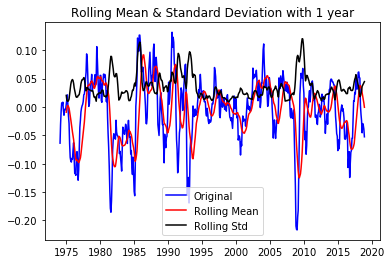

ADF Statistic: -7.08789020991196
p-value: 4.488778393837242e-10
Critical Values:
	1%: -3.4426321555520905
	5%: -2.86695748394138
	10%: -2.5696553279762426


In [12]:
rolling_mean = ts_log.rolling(window=12).mean()
ts_log_minus_mean = ts_log - rolling_mean
ts_log_minus_mean.dropna(inplace=True)
get_stationarity(ts_log_minus_mean)

As we can see, after subtracting the mean, the rolling mean and standard deviation are approximately horizontal. The p-value is below the threshold of 0.01. Therefore, the time series is stationary.

Applying exponential decay is another way of transforming a time series such that it is stationary.

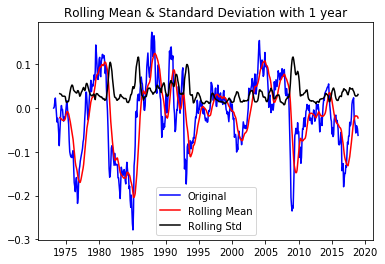

ADF Statistic: -4.4471661687172634
p-value: 0.00024469370848149297
Critical Values:
	1%: -3.442383534871275
	5%: -2.8668480382580386
	10%: -2.569597004924258


In [13]:
rolling_mean_exp_decay = ts_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
ts_log_exp_decay = ts_log - rolling_mean_exp_decay
ts_log_exp_decay.dropna(inplace=True)
get_stationarity(ts_log_exp_decay)

Exponential decay performed worse than subtracting the rolling mean. However, it is still more stationary than the original.

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

Let’s try one more method to determine whether an even better solution exists. When applying time shifting, we subtract every the point by the one that preceded it.

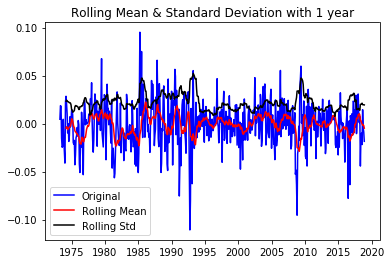

ADF Statistic: -11.256711454752706
p-value: 1.6601809877185032e-20
Critical Values:
	1%: -3.442383534871275
	5%: -2.8668480382580386
	10%: -2.569597004924258


In [14]:
ts_log_shift = ts_log - ts_log.shift()
ts_log_shift.dropna(inplace=True)
get_stationarity(ts_log_shift)

Time shifting performed better than others.

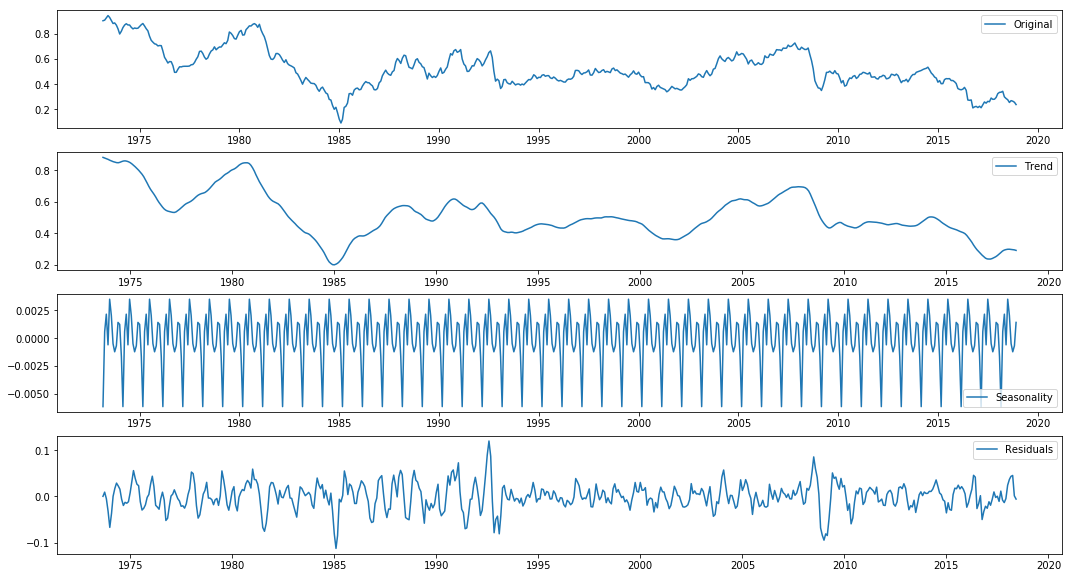

In [15]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual =decomposition.resid

plt.figure(figsize=[18,10])
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

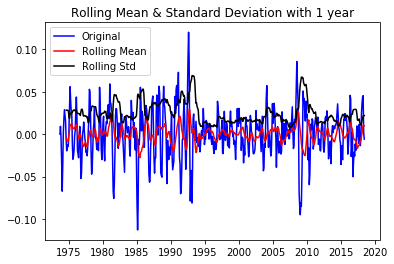

ADF Statistic: -8.03423526529949
p-value: 1.9217911217687368e-12
Critical Values:
	1%: -3.4430126933746767
	5%: -2.8671249839002764
	10%: -2.569744590233924


In [16]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
get_stationarity(ts_log_decompose)

## 4. Model Data 

Auto Correlation Function (ACF)
The correlation between the observations at the current point in time and the observations at all previous points in time. We can use ACF to determine the optimal number of MA terms. The number of terms determines the order of the model.

Partial Auto Correlation Function (PACF)
As the name implies, PACF is a subset of ACF. PACF expresses the correlation between observations made at two points in time while accounting for any influence from other data points. We can use PACF to determine the optimal number of terms to use in the AR model. The number of terms determines the order of the model.

Recall, that PACF can be used to figure out the best order of the AR model, that ACF can be used to figure out the best order of the MA model.

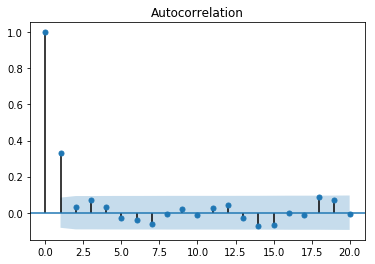

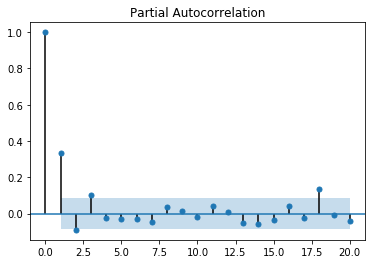

In [17]:
plot_acf(ts_log_shift,lags=20)
plot_pacf(ts_log_shift,lags=20)
plt.show()

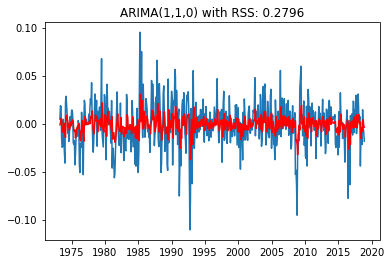

-2598.6113684902425

In [38]:
#AR Model
model = ARIMA(ts_log, order=(1,1,0),freq='MS')
results_AR1 = model.fit(disp=-1)
plt.plot(ts_log_shift)
plt.plot(results_AR1.fittedvalues, color='red')
plt.title('ARIMA(1,1,0) with RSS: %.4f'% sum((results_AR1.fittedvalues-ts_log_shift['s_us_uk'])**2))
plt.show()
results_AR1.aic

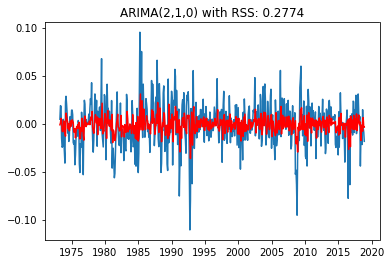

-2601.0676005437003

In [39]:
# AR Model
model = ARIMA(ts_log, order=(2,1,0),freq='MS')
results_AR2 = model.fit(disp=-1)
plt.plot(ts_log_shift)
plt.plot(results_AR2.fittedvalues, color='red')
plt.title('ARIMA(2,1,0) with RSS: %.4f'% sum((results_AR2.fittedvalues-ts_log_shift['s_us_uk'])**2))
plt.show()
results_AR2.aic

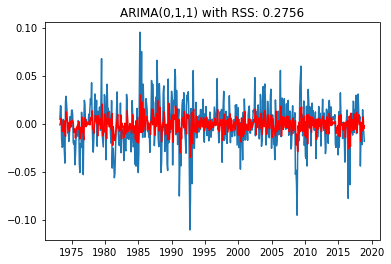

-2606.5399600647847

In [40]:
# MA Model
model = ARIMA(ts_log, order=(0,1,1),freq='MS')
results_MA = model.fit(disp=-1)
plt.plot(ts_log_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('ARIMA(0,1,1) with RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_shift['s_us_uk'])**2))
plt.show()
results_MA.aic

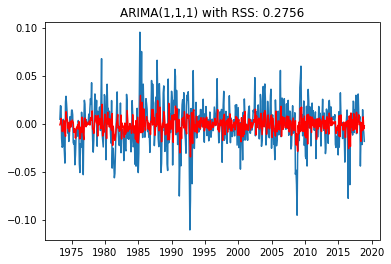

-2604.5570519846738

In [41]:
#ARIMA Model
model = ARIMA(ts_log, order=(1,1,1),freq='MS')
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA(1,1,1) with RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_shift['s_us_uk'])**2))
plt.show()
results_ARIMA.aic

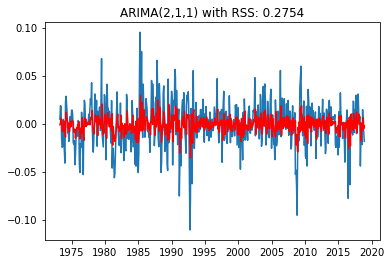

-2603.0654315763873

In [45]:
#ARIMA Model
model = ARIMA(ts_log, order=(2,1,1),freq='MS')
results_ARIMA2 = model.fit(disp=-1)
plt.plot(ts_log_shift)
plt.plot(results_ARIMA2.fittedvalues, color='red')
plt.title('ARIMA(2,1,1) with RSS: %.4f'% sum((results_ARIMA2.fittedvalues-ts_log_shift['s_us_uk'])**2))
plt.show()
results_ARIMA2.aic

ARIMA(0,1,1) is better.

Then, we can see how the model compares to the original time series.

In [31]:
ts.shape
#next 10 years +120

(550, 1)

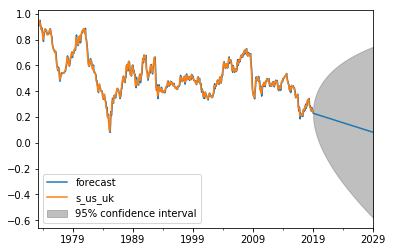

In [47]:
results_MA.plot_predict(1,670);

In [36]:
%%latex
ARIMA model prediction  (stata xb)
\begin{align}
dy_t=\beta dy_{t-1}+\epsilon_t
\end{align}
one step ahead forecasting    (stata y)
\begin{align}
y_t=\beta dy_{t-1}+y_{t-1}+\epsilon_t
\end{align}
If we know $y_0,y_1,y_2,y_3$, then $dy_0\equiv0,dy_1,dy_2,dy_3$,we want to calculate $\hat{y_3}$
\begin{align}
\hat{dy_1}=\beta dy_0=0\\
\hat{dy_2}=\beta dy_1\\
\hat{dy_3}=\beta dy_2\\
\hat{y_3}=\hat{dy_3}+\hat{dy_2}+\hat{dy_1}+y_0=\beta dy_2+\beta dy_1+y_0=\beta (y_2-y_0)+y_0=\beta y_2+(1-\beta)y_0\\
\hat{y_3}=(1+\beta)y_2-\beta y_1
\end{align}

<IPython.core.display.Latex object>

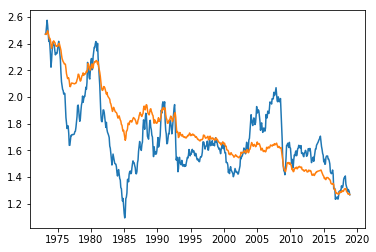

In [48]:
predictions_ARIMA_diff = pd.Series(results_AR1.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log['s_us_uk'].iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.show()

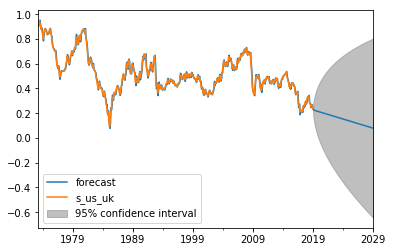

In [49]:
results_AR1.plot_predict(1,670);